In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908_t0_2023.csv', encoding='ISO-8859-1')

In [ ]:
df.head()

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Time                   3486 non-null   object 
 2   Location               4994 non-null   object 
 3   Operator               4988 non-null   object 
 4   Flight #               1329 non-null   object 
 5   Route                  4222 non-null   object 
 6   AC Type                4983 non-null   object 
 7   Registration           4724 non-null   object 
 8   cn/ln                  4330 non-null   object 
 9   Aboard                 4980 non-null   float64
 10  Aboard Passangers      4769 non-null   float64
 11  Aboard Crew            4772 non-null   float64
 12  Fatalities             4990 non-null   float64
 13  Fatalities Passangers  4756 non-null   float64
 14  Fatalities Crew        4757 non-null   float64
 15  Grou

In [ ]:
df.isnull().sum()

Date                        0
Time                     1512
Location                    4
Operator                   10
Flight #                 3669
Route                     776
AC Type                    15
Registration              274
cn/ln                     668
Aboard                     18
Aboard Passangers         229
Aboard Crew               226
Fatalities                  8
Fatalities Passangers     242
Fatalities Crew           241
Ground                     42
Summary                    64
dtype: int64

In [ ]:
df.shape

(4998, 17)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df['Year'] = df['Date'].dt.year

In [ ]:
df['Year']

0       1908
1       1909
2       1912
3       1913
4       1913
        ... 
4993    2022
4994    2023
4995    2023
4996    2023
4997    2023
Name: Year, Length: 4998, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

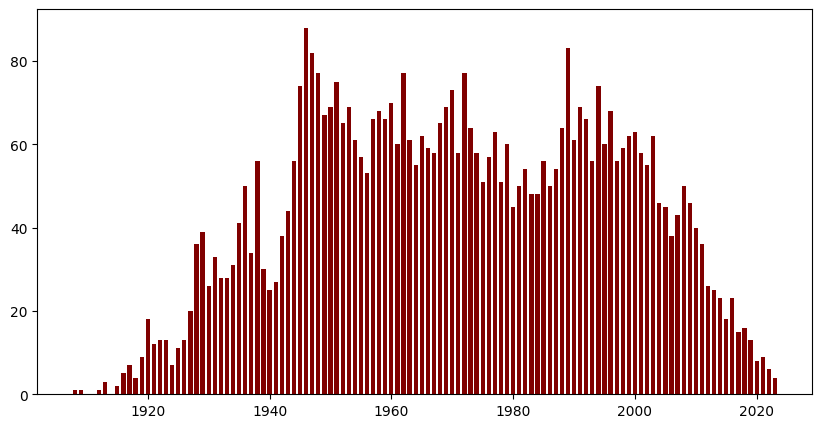

In [ ]:
count = df['Year'].value_counts()

index = count.index
values = count.values

fig = plt.figure(figsize=(10,5))
plt.bar(index, values, color='maroon', width=0.7)

plt.show

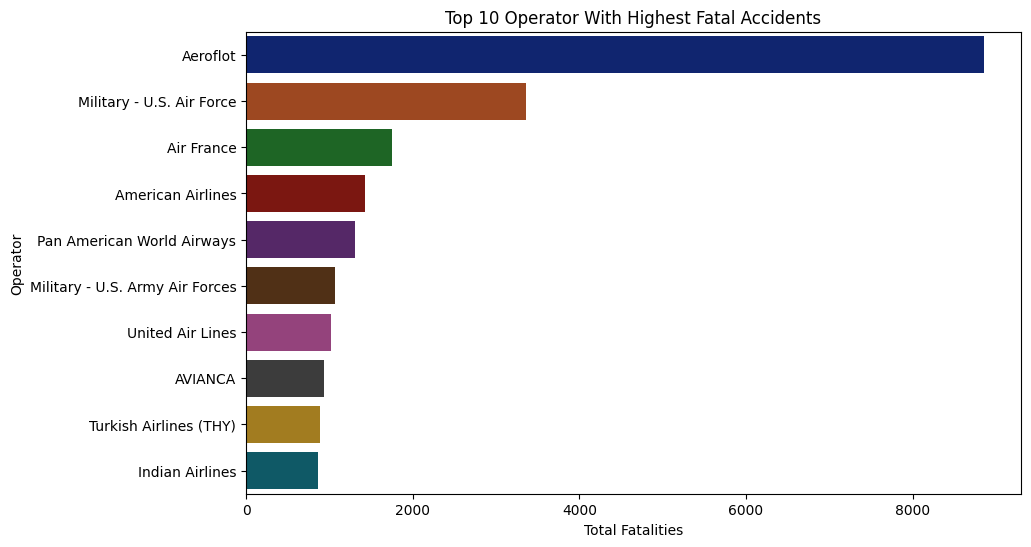

In [ ]:
fatal = df.groupby('Operator')['Fatalities'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x = 'Fatalities', y = 'Operator', data = fatal.head(10), palette = 'dark')
plt.title('Top 10 Operator With Highest Fatal Accidents')
plt.xlabel('Total Fatalities')
plt.ylabel('Operator')

plt.show()

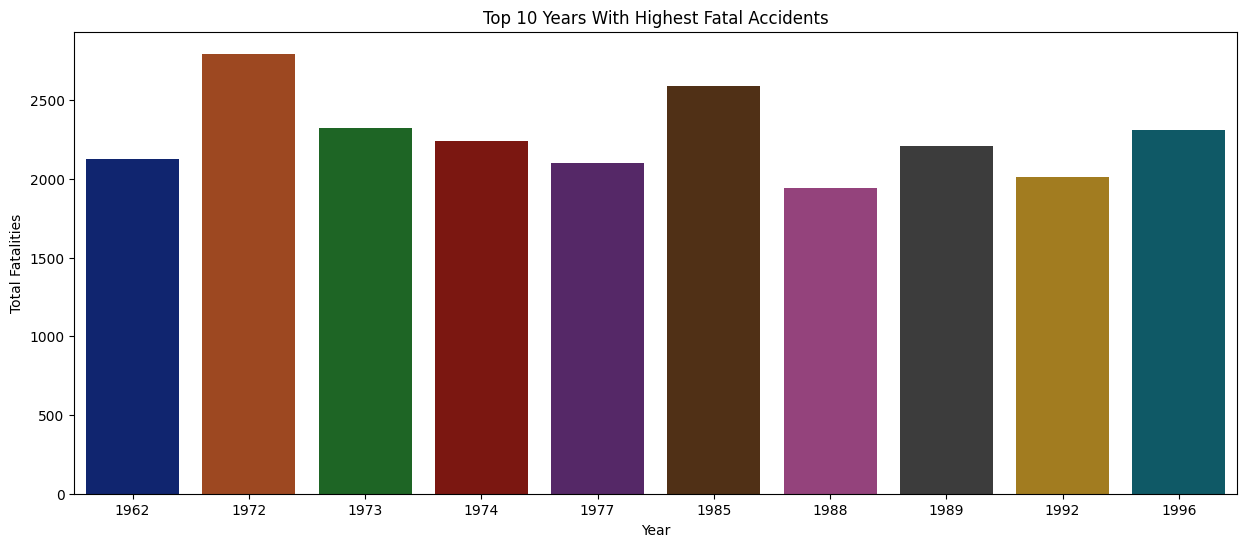

In [ ]:
year_fatal = df.groupby('Year')['Fatalities'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(15,6))
sns.barplot(x='Year', y='Fatalities', data=year_fatal.head(10), palette='dark')
plt.title('Top 10 Years 1908s With Highest Fatal Accidents')
plt.xlabel('Year')
plt.ylabel('Total Fatalities')

plt.show()

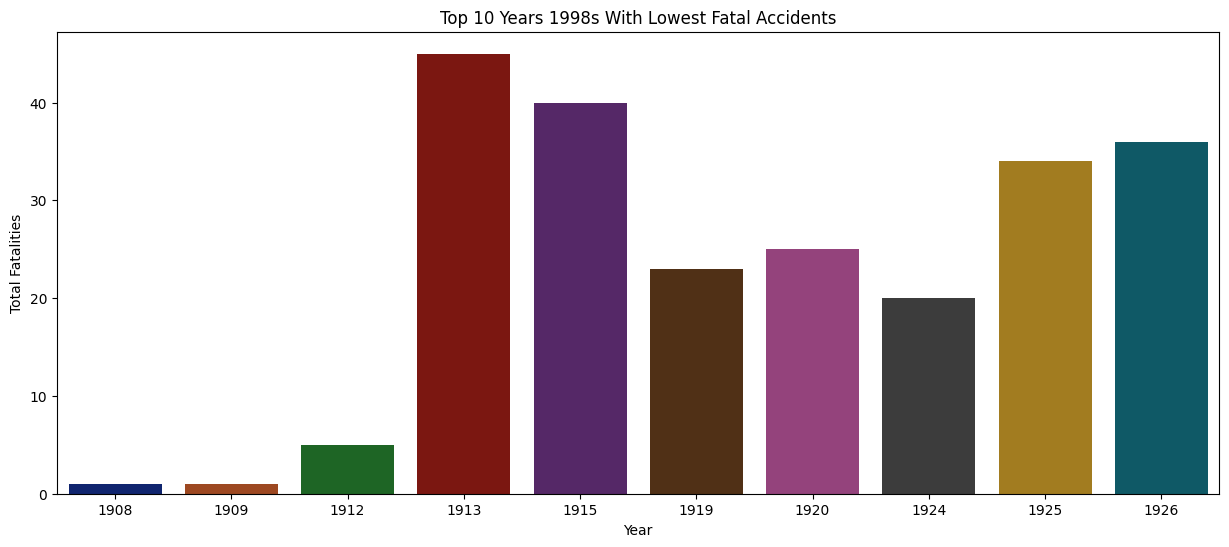

In [ ]:
year_fatal = df.groupby('Year')['Fatalities'].sum().sort_values(ascending=True).reset_index()

plt.figure(figsize=(15,6))
sns.barplot(x='Year', y='Fatalities', data=year_fatal.head(10), palette='dark')
plt.title('Top 10 Years 1998s With Lowest   Fatal Accidents')
plt.xlabel('Year')
plt.ylabel('Total Fatalities')

plt.show()

In [ ]:
df['2023'] = df['Year'].where(df['Year'] >= 2000)

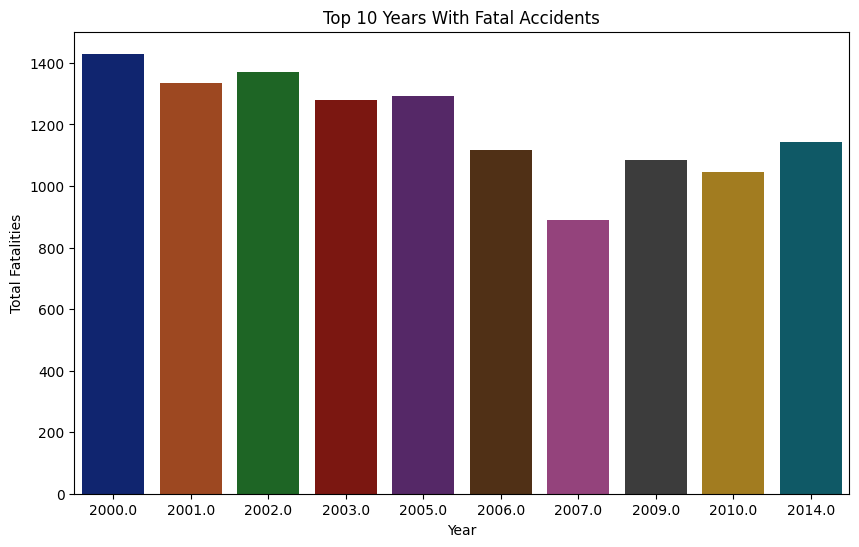

In [ ]:
year_fatal = df.groupby('2023')['Fatalities'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x= '2023', y='Fatalities', data=year_fatal.head(10), palette='dark')
plt.title('Top 10 Years 2000s With Highest Fatal Accidents')
plt.xlabel('Year')
plt.ylabel('Total Fatalities')

plt.show()

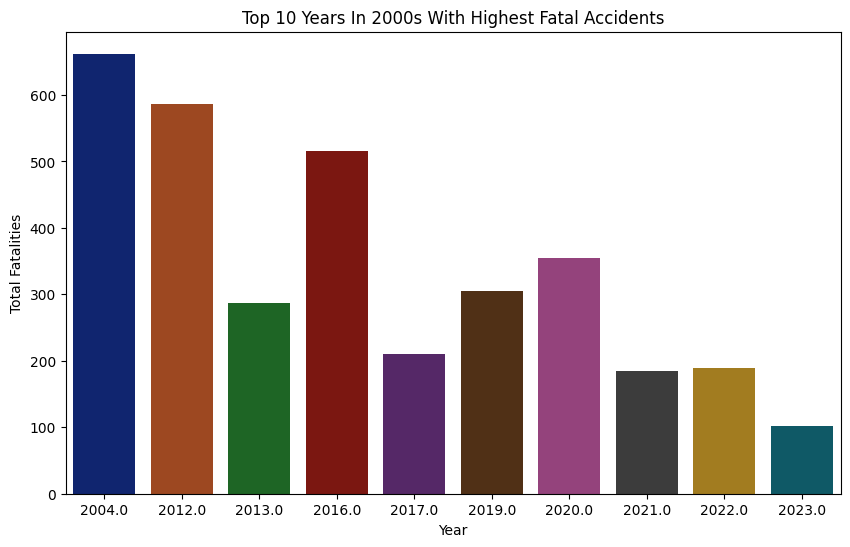

In [ ]:
year_fatal = df.groupby('2023')['Fatalities'].sum().sort_values(ascending=True).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x= '2023', y='Fatalities', data=year_fatal.head(10), palette='dark')
plt.title('Top 10 Years 2000s With Lowest Fatal Accidents')
plt.xlabel('Year')
plt.ylabel('Total Fatalities')

plt.show()

In [ ]:
df['ac type'] = df['AC Type'].where(df['AC Type'] != 0)

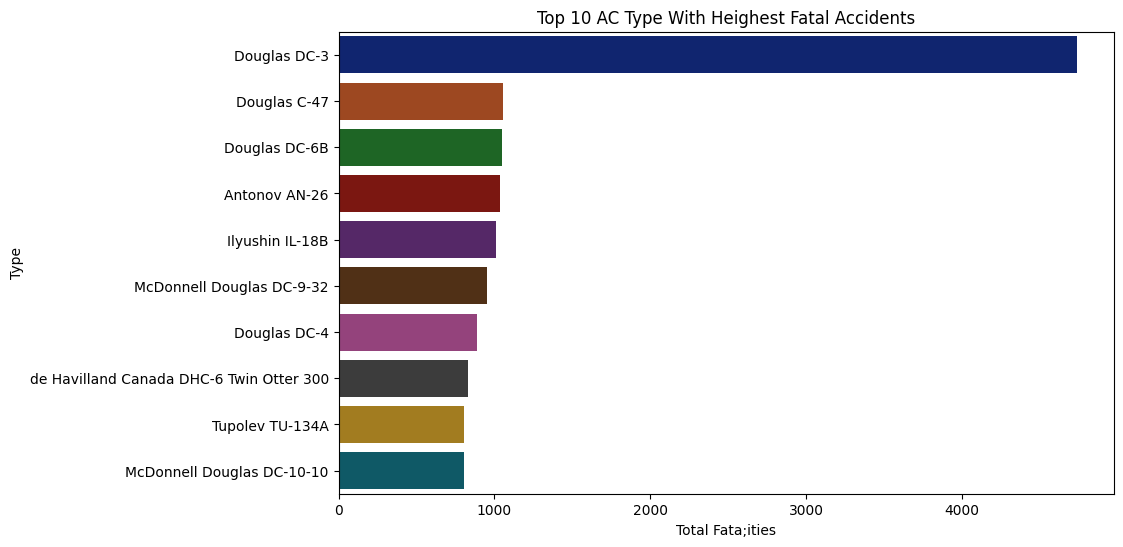

In [ ]:
type_fatal = df.groupby('ac type')['Fatalities'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x= 'Fatalities', y='ac type', data=type_fatal.head(10), palette='dark')
plt.title('Top 10 AC Type With Most Accidents')
plt.xlabel('Total Fatalities')
plt.ylabel('Type')

plt.show()

In [ ]:
df['ac type 2000'] = df['AC Type'].where(df['Year'] >= 2000)

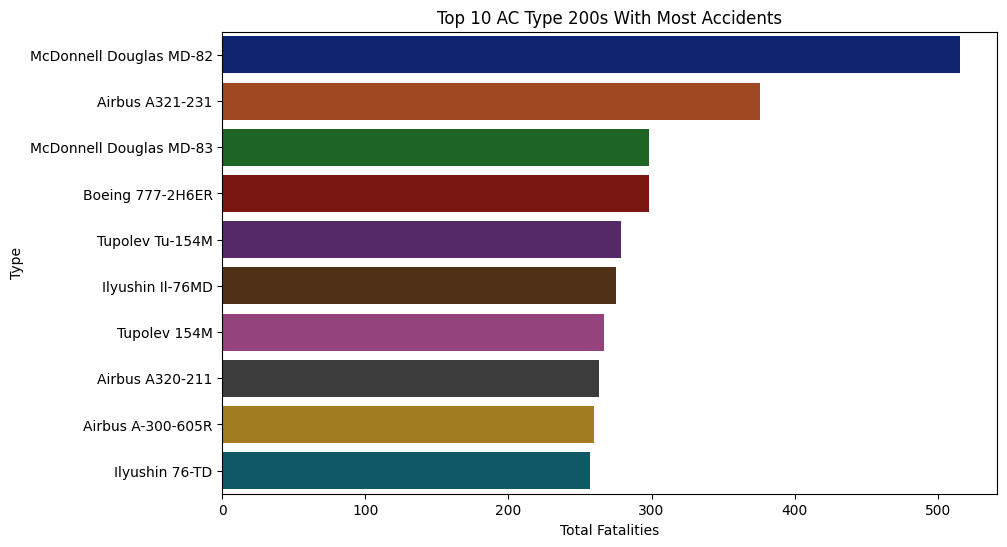

In [ ]:
type_fatal = df.groupby('ac type 2000')['Fatalities'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(x= 'Fatalities', y='ac type 2000', data=type_fatal.head(10), palette='dark')
plt.title('Top 10 AC Type 2000s With Most Accidents')
plt.xlabel('Total Fatalities')
plt.ylabel('Type')

plt.show()

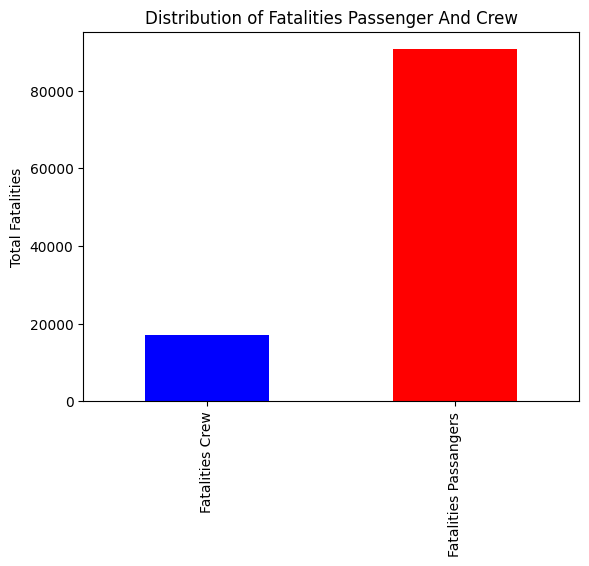

In [ ]:
fatalities_crew_passanger = df[['Fatalities Crew', 'Fatalities Passangers']].sum()

fatalities_crew_passanger.plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Fatalities Passenger And Crew')
plt.ylabel('Total Fatalities')

plt.show()

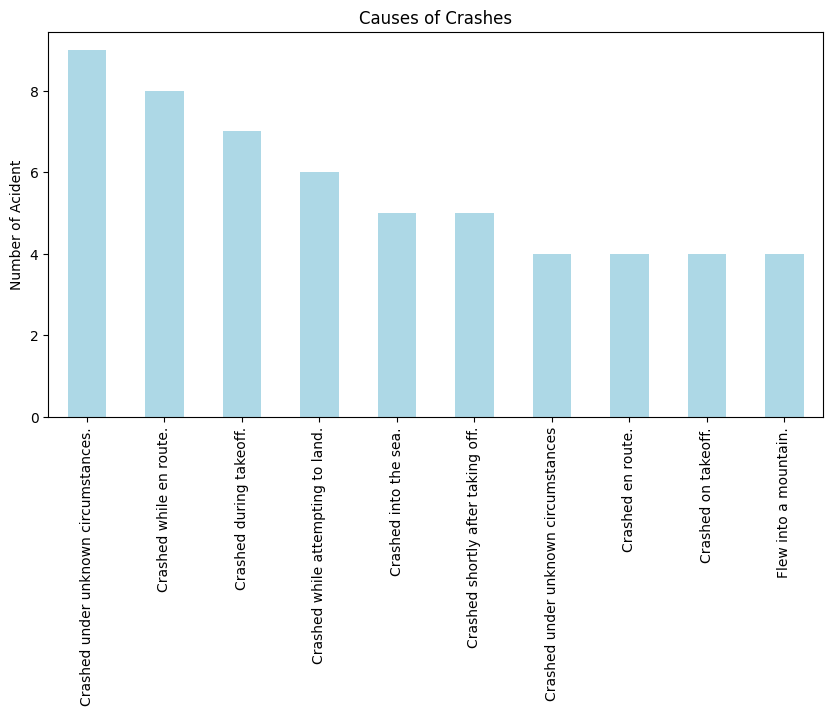

In [ ]:
causes_of_acident = df['Summary'].value_counts().head(10)
plt.figure(figsize=(10,5))
causes_of_acident.plot(kind='bar', color='lightblue')
plt.title('Causes of Crashes')
plt.ylabel('Number of Acident')

plt.show()

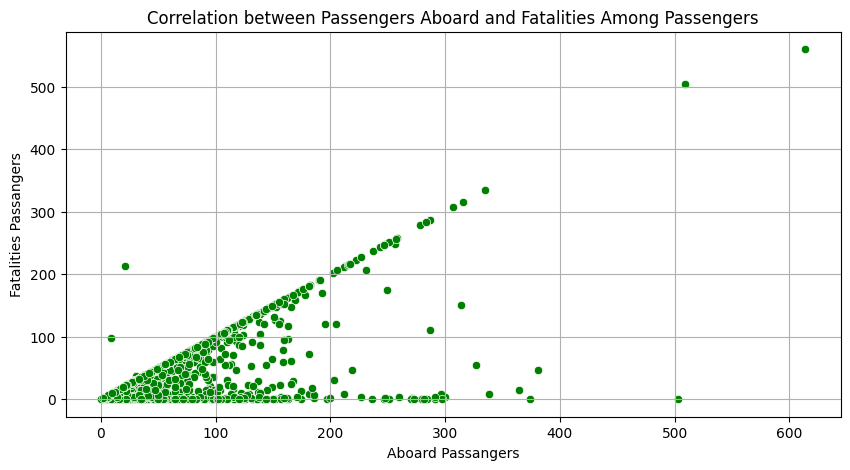

In [ ]:
plt.figure(figsize=(10,5))

sns.scatterplot(x= 'Aboard Passangers', y='Fatalities Passangers', data=df, color='green')
plt.title('Correlation between Passengers Aboard and Fatalities Among Passengers')
plt.xlabel('Aboard Passangers')
plt.ylabel('Fatalities Passangers')
plt.grid(True)

plt.show()

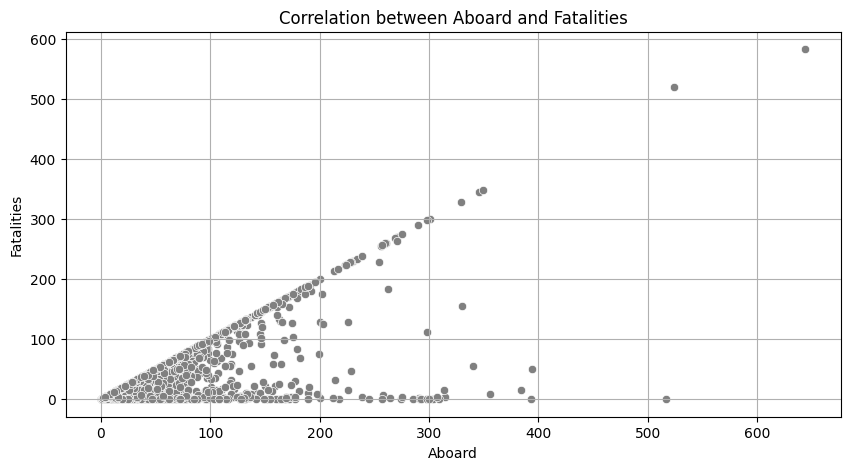

In [ ]:
plt.figure(figsize=(10,5))

sns.scatterplot(x= 'Aboard', y='Fatalities', data=df, color='gray')
plt.title('Correlation between Aboard and Fatalities')
plt.xlabel('Aboard')
plt.ylabel('Fatalities')
plt.grid(True)

plt.show()

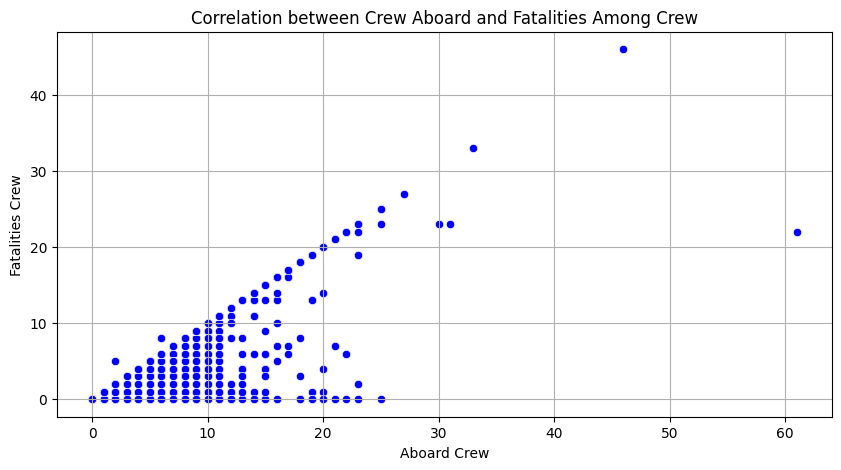

In [ ]:
plt.figure(figsize=(10,5))

sns.scatterplot(x= 'Aboard Crew', y='Fatalities Crew', data=df, color='blue')
plt.title('Correlation between Crew Aboard and Fatalities Among Crew')
plt.xlabel('Aboard Crew')
plt.ylabel('Fatalities Crew')
plt.grid(True)

plt.show()